Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 89.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/sentiment_data.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 57.9MB/s]


 Average Trader Profit/Loss:

classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64


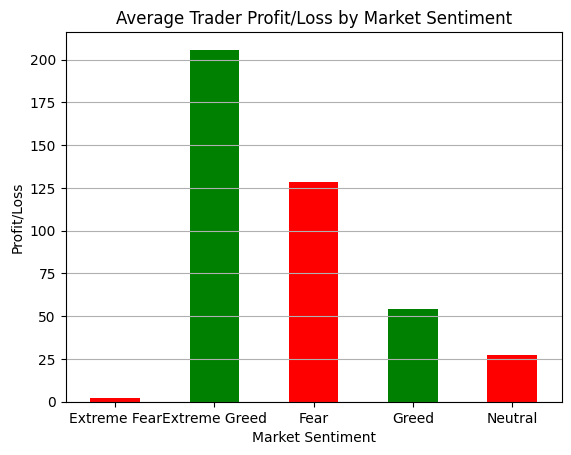

In [1]:
!pip install gdown

import gdown
import pandas as pd
import matplotlib.pyplot as plt

trader_file = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_file = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

gdown.download(trader_file, "trader_data.csv", quiet=False)
gdown.download(sentiment_file, "sentiment_data.csv", quiet=False)

df_traders = pd.read_csv("trader_data.csv")
df_sentiment = pd.read_csv("sentiment_data.csv")

df_traders['date'] = pd.to_datetime(df_traders['Timestamp IST'], errors='coerce').dt.date
df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.date

df_merged = pd.merge(df_traders, df_sentiment[['date', 'classification']], on='date', how='inner')

profit_analysis = df_merged.groupby("classification")["Closed PnL"].mean()
print(" Average Trader Profit/Loss:\n")
print(profit_analysis)

profit_analysis.plot(kind="bar", color=["red", "green"])
plt.title("Average Trader Profit/Loss by Market Sentiment")
plt.ylabel("Profit/Loss")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Summary

- The data reveals that trader profits were higher during **Greed** periods than during **Fear**.
- This suggests traders may be more successful in optimistic markets.
- Understanding market sentiment can help design smarter and safer trading strategies.
